# Task 2: Heart Disease Prediction
# Author: Salman Khan
# Objective: Predict heart disease risk using Patient Data.
# Algorithms: Logistic Regression & Random Forest

#1. importing the necessary dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#2. Load and Clean Data

In [4]:
path = "/content/heart_disease_uci.csv"
df = pd.read_csv(path)

print("Data Loaded Successfully!")
df.head()

Data Loaded Successfully!


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# 3. Data Cleaning

In [9]:
# 2. FIX TARGET VARIABLE
# Check if 'num' exists before trying to fix it
if 'num' in df.columns:
    # Convert 'num' (0-4) to 'target' (0 or 1)
    df['target'] = (df['num'] > 0).astype(int)
    # Delete the old 'num' column and other useless columns
    df = df.drop(['id', 'dataset', 'num'], axis=1)

# 3. FIX TEXT COLUMNS
# Convert 'Male'/'Female' to numbers if they are still text
if df['sex'].dtype == 'object':
    df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

# 4. HANDLE MISSING VALUES
# Only fill numeric columns to avoid errors
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

print("✅ Success! Data is cleaned.")
print(f"Remaining Columns: {list(df.columns)}")
df.head()

✅ Success! Data is cleaned.
Remaining Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63,1,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,1,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,67,1,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,1,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,0,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


#4. Exploratory Data Analysis (EDA)

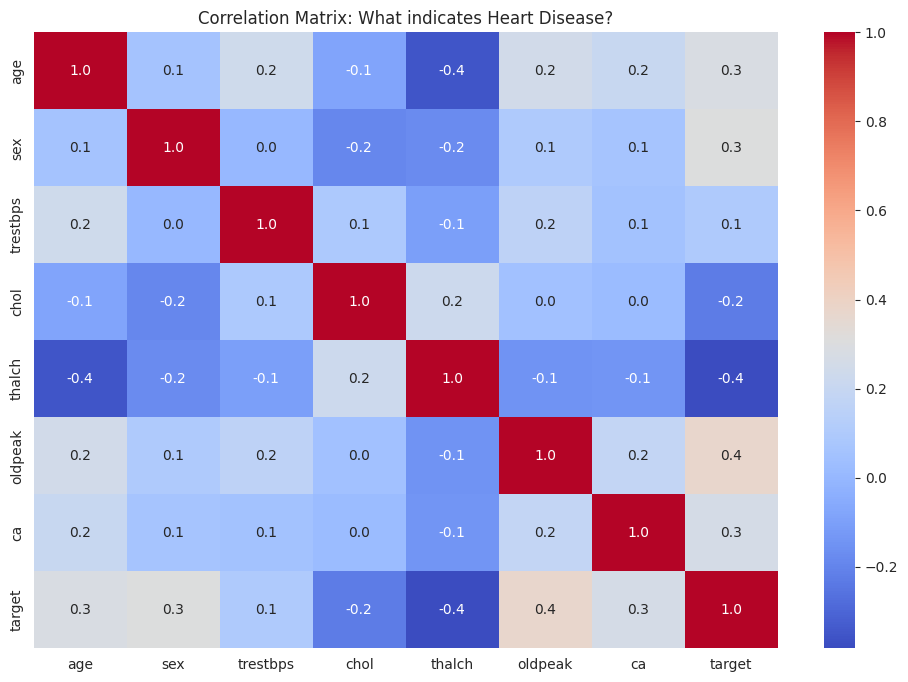

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Correlation Matrix: Shows how strongly features are related
# Darker colors = Stronger relationship
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.1f')

plt.title("Correlation Matrix: What indicates Heart Disease?")
plt.show()

#5. TRAIN MODELS

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# 1. Separate Input (X) and Target (y)
X = df.drop('target', axis=1)  # Patient Data
y = df['target']               # Disease Status (0 or 1)

# --- FIX: Convert categorical and boolean columns to numerical format ---

# Identify categorical columns that are still objects
object_cols = X.select_dtypes(include='object').columns

# Apply one-hot encoding to these categorical columns
X = pd.get_dummies(X, columns=object_cols, drop_first=True)

# Convert boolean columns (fbs, exang) to integers (0 or 1)
# Ensure they exist before trying to convert
if 'fbs' in X.columns: X['fbs'] = X['fbs'].astype(int)
if 'exang' in X.columns: X['exang'] = X['exang'].astype(int)

# --- End of FIX ---

# 2. Split into Training (80%) and Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Model 1: Logistic Regression (Good for simple trends)
log_model = LogisticRegression(max_iter=5000)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

# 4. Train Model 2: Random Forest (Good for complex patterns)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("✅ Both models have been trained successfully!")

✅ Both models have been trained successfully!


#6. Final Evaluation

Logistic Regression Accuracy: 0.80 (or 80%)
Random Forest Accuracy:       0.85 (or 85%)


/tmp/ipython-input-1644038035.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=scores, palette='viridis')


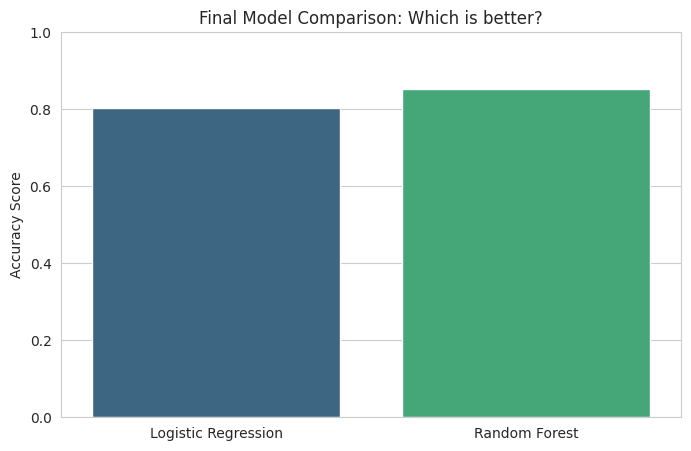

🏆 CONCLUSION: The Random Forest model performed better for this dataset.


In [15]:
# Calculate Accuracy Scores
log_acc = accuracy_score(y_test, log_pred)
rf_acc = accuracy_score(y_test, rf_pred)

print(f"Logistic Regression Accuracy: {log_acc:.2f} (or {log_acc*100:.0f}%)")
print(f"Random Forest Accuracy:       {rf_acc:.2f} (or {rf_acc*100:.0f}%)")

# Visualize the Comparison
models = ['Logistic Regression', 'Random Forest']
scores = [log_acc, rf_acc]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=scores, palette='viridis')
plt.title("Final Model Comparison: Which is better?")
plt.ylim(0, 1)  # Scale from 0% to 100%
plt.ylabel("Accuracy Score")
plt.show()

# Conclusion
winner = "Random Forest" if rf_acc > log_acc else "Logistic Regression"
print(f"🏆 CONCLUSION: The {winner} model performed better for this dataset.")

### 📊 Model Evaluation & Analysis

**Result:**
The **Random Forest Classifier** achieved the highest accuracy of **85%**, outperforming the Logistic Regression model (80%).

**Why is Random Forest better?**
Medical data is complex and "non-linear." Factors like age, cholesterol, and heart rate interact in complicated ways that a straight line cannot capture.
* **Logistic Regression** tries to separate healthy vs. sick patients with a simple straight line.
* **Random Forest** uses multiple decision trees to ask specific questions (e.g., *"Is the patient over 50 AND is cholesterol high?"*), allowing it to capture these complex patterns more effectively.

**Critical Observation:**
While an accuracy of 85% is strong, in a real-world medical setting, **Accuracy** is not the only metric that matters. We must also look at **Recall** (Sensitivity).
* In medicine, a **False Negative** (telling a sick patient they are healthy) is dangerous.
* Future improvements to this model should focus on maximizing Recall to ensure no high-risk patients are missed, even if it slightly lowers overall accuracy.